## Correlation between EV charge point and air quality in April 2020

In [1]:
import pandas as pd

# Read the Excel file
file_path = "repolicate-ev-charge-point-data-april-2020.xlsx"
data = pd.read_excel(file_path)

# Delete the "Model Variant" column
data = data.drop("Model Variant", axis=1)

# Delete rows where "Energy (kWh)" is less than 1
data = data[data["Energy (kWh)"] >= 1]

# Extract the text before the letter "T" in the "Plug In Time" column (i.e., the date)
data["Plug In Time"] = data["Plug In Time"].apply(lambda x: x.split("T")[0])

# Convert the time format of the "Duration" column from hours:minutes:seconds to minutes
def duration_to_minutes(duration_str):
    hours, minutes, seconds = map(float, duration_str.split(":"))
    total_minutes = hours * 60 + minutes + seconds / 60
    return total_minutes

data["Duration"] = data["Duration"].apply(duration_to_minutes)

# Delete rows where "Duration" is less than 1
data = data[data["Duration"] >= 1]

# Store the processed data in a new DataFrame
processed_data = data.reset_index(drop=True)

# View the processed data
print(processed_data)


   Chargepoint                        Location  Energy (kWh) Plug In Time  \
0        10403       Brunswick Square, York St         3.525   2020-10-04   
1        10403       Brunswick Square, York St         4.302   2020-04-25   
2        10403       Brunswick Square, York St         4.805   2020-04-18   
3        10403       Brunswick Square, York St         3.725   2020-08-04   
4        10403       Brunswick Square, York St         2.280   2020-04-22   
..         ...                             ...           ...          ...   
68     RV01011              Trenchard Car Park         7.600   2020-03-04   
69     RV01013              Trenchard Car Park        17.040   2020-04-30   
70     RV01014              Trenchard Car Park        16.510   2020-04-27   
71     RV01018  Create Centre - Records Office        18.190   2020-04-26   
72     RV01018  Create Centre - Records Office         2.000   2020-04-16   

       Duration  
0    307.000000  
1    143.000000  
2   5354.000000  
3  

C:\Users\Cathy\AppData\Local\Temp\ipykernel_17936\2046745477.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data["Plug In Time"] = pd.to_datetime(location_data["Plug In Time"])
C:\Users\Cathy\AppData\Local\Temp\ipykernel_17936\2046745477.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data["Plug In Time"] = pd.to_datetime(location_data["Plug In Time"])
C:\Users\Cathy\AppData\Local\Temp\ipykernel_17936\2046745477.py:19: SettingWithCopyWarning: 
A value is trying to be set on a co

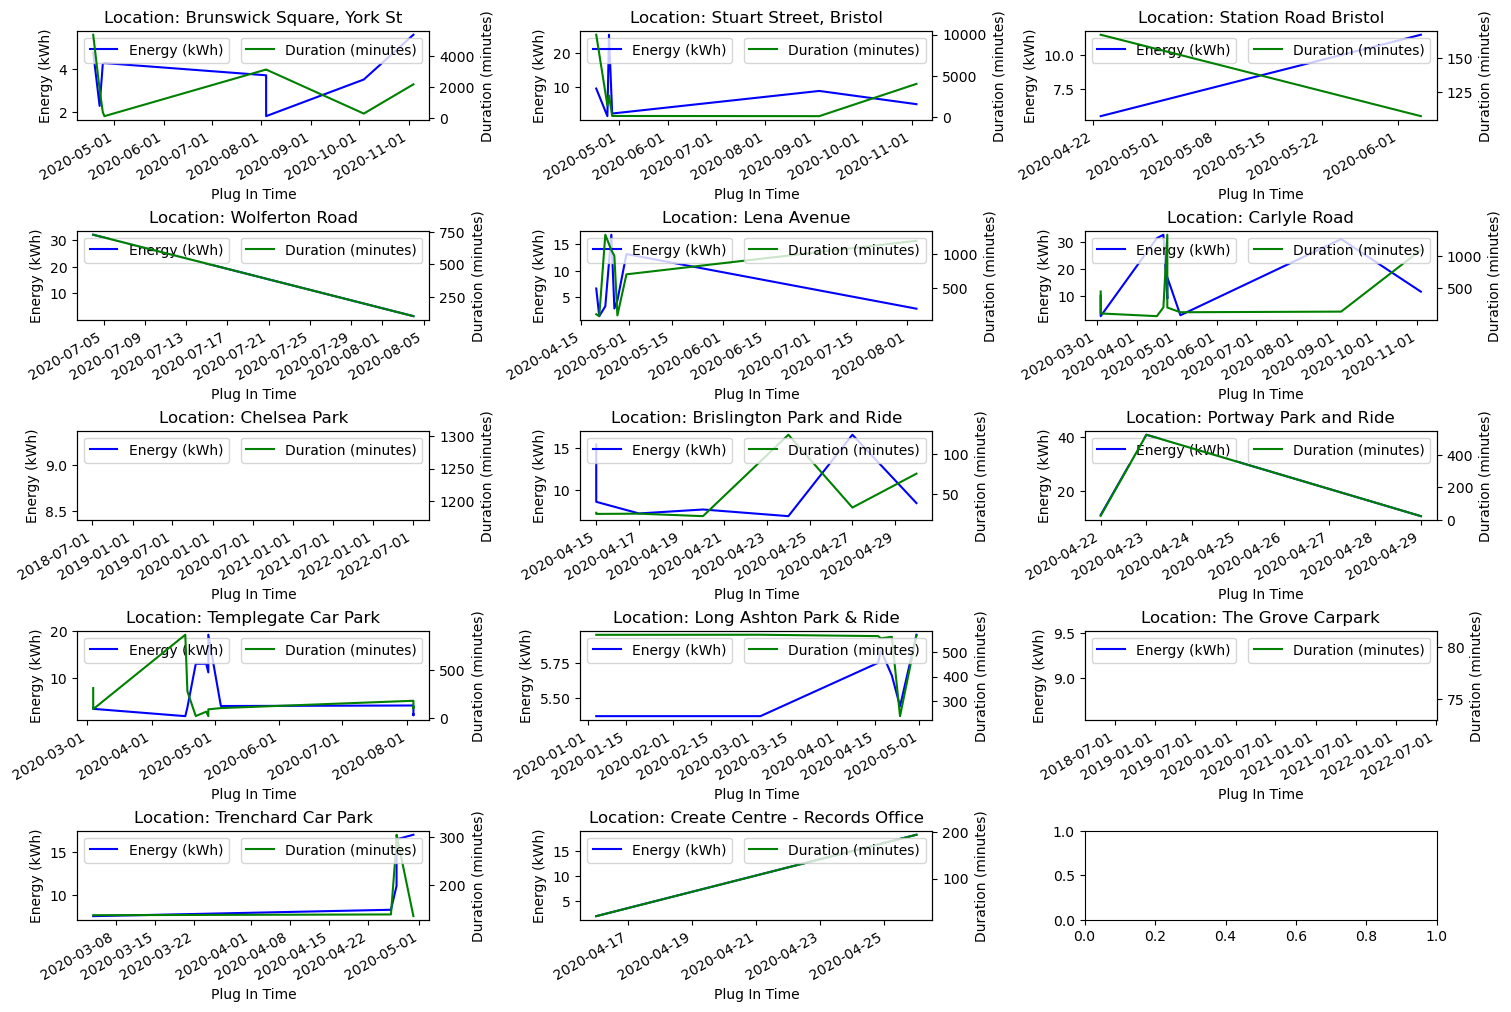

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assume processed_data is the preprocessed DataFrame
locations = processed_data["Location"].unique()

# Set the number of rows and columns of subplots
nrows, ncols = 5, 3  # Adjust according to the number of locations

# Create the figure and subplot axes
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)
axs = axs.flatten()

for idx, location in enumerate(locations):
    location_data = processed_data[processed_data["Location"] == location]

    # Convert the "Plug In Time" column to datetime
    location_data["Plug In Time"] = pd.to_datetime(location_data["Plug In Time"])

    # Sort the data by "Plug In Time"
    location_data = location_data.sort_values("Plug In Time")

    ax1 = axs[idx]
    ax2 = ax1.twinx()

    # Plot the "Energy (kWh)" line chart
    ax1.plot(location_data["Plug In Time"], location_data["Energy (kWh)"], color='blue', label='Energy (kWh)')
    
    # Plot the "Duration" line chart
    ax2.plot(location_data["Plug In Time"], location_data["Duration"], color='green', label='Duration (minutes)')

    # Set the format of the x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')

    # Set the title and axis labels
    ax1.set_title(f"Location: {location}")
    ax1.set_xlabel("Plug In Time")
    ax1.set_ylabel("Energy (kWh)")
    ax2.set_ylabel("Duration (minutes)")

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Save the figure to a file
plt.savefig("location_energy_duration_plot.png", dpi=300)

# Show the figure in a window
plt.show()



In [3]:
import pandas as pd

# Assume processed_data is the preprocessed DataFrame

# Convert the "Plug In Time" column to datetime
processed_data["Plug In Time"] = pd.to_datetime(processed_data["Plug In Time"])

# Group the data by "Plug In Time" and calculate the sum of "Energy (kWh)" and "Duration"
grouped_data = processed_data.groupby("Plug In Time").agg({"Energy (kWh)": "sum", "Duration": "sum"}).reset_index()

# Rename the columns
grouped_data = grouped_data.rename(columns={"Energy (kWh)": "Energy Total", "Duration": "Duration Total"})

# View the new DataFrame
print(grouped_data)


   Plug In Time  Energy Total  Duration Total
0    2020-01-04         5.370      567.416667
1    2020-03-04        32.360     1678.666667
2    2020-04-15        23.970       51.766667
3    2020-04-16        39.210      650.750000
4    2020-04-17        24.524    11423.333333
5    2020-04-18         8.545     5636.166667
6    2020-04-20        14.290      143.966667
7    2020-04-21        39.760      857.266667
8    2020-04-22        26.300     1899.750000
9    2020-04-23        49.650     1975.100000
10   2020-04-24        43.713     3724.683333
11   2020-04-25        55.704     3920.600000
12   2020-04-26        29.350     1309.500000
13   2020-04-27        63.711      983.133333
14   2020-04-28        30.340      117.950000
15   2020-04-29        10.600       22.316667
16   2020-04-30        44.590     1481.366667
17   2020-05-04         6.700      237.350000
18   2020-06-04        11.490      107.500000
19   2020-07-04        40.760     1966.666667
20   2020-08-04        18.420     

## 2020 Air Quality Data Preprocessing

In [4]:
import pandas as pd

# Read the Excel file
file_path = "2020-air-quality-data-continuous.xlsx"
data = pd.read_excel(file_path)

# Split the "geo_point_2d" column into "Latitude" and "Longitude" columns
data[["Latitude", "Longitude"]] = data["geo_point_2d"].str.split(", ", expand=True).astype(float)

# Extract the text before the letter "T" in the "Date" column (i.e., the date)
data["Date"] = data["Date"].apply(lambda x: x.split("T")[0])

# Create a new DataFrame, calculate the mean of each column for each "Date"
columns_to_average = ["NOx","NO2", "NO", "PM10", "NVPM10", "VPM10", "NVPM2.5", "PM2.5", "VPM2.5", "CO", "O3", "SO2", "Temperature", "RH", "Air Pressure"]
averaged_data = data.groupby("Date")[columns_to_average].mean().reset_index()

# Assume grouped_data is the preprocessed DataFrame, containing "Plug In Time", "Energy Total" and "Duration Total" columns

# Only keep the dates in averaged_data that match the "Plug In Time" column in grouped_data and the same day of the next month
filtered_dates = pd.to_datetime(grouped_data["Plug In Time"]).dt.date
next_month_dates = filtered_dates + pd.DateOffset(months=1)
selected_dates = filtered_dates.append(next_month_dates).unique()

filtered_averaged_data = averaged_data[pd.to_datetime(averaged_data["Date"]).isin(selected_dates)].reset_index(drop=True)

# View the new DataFrame
print(filtered_averaged_data)



          Date         NOx        NO2          NO       PM10  NVPM10  VPM10  \
0   2020-01-04   80.617225  36.653522   28.671882  15.498958     NaN    NaN   
1   2020-02-04   63.505310  28.545226   22.801855  21.054042     NaN    NaN   
2   2020-03-04  109.421401  47.623441   40.303827  14.314375     NaN    NaN   
3   2020-04-04   27.719915  17.635718    6.565562  14.074917     NaN    NaN   
4   2020-04-15   38.386784  24.813720    8.863203  27.142229     NaN    NaN   
5   2020-04-16   46.613260  31.763200    9.679332  40.702197     NaN    NaN   
6   2020-04-17   29.520030  20.967301    5.595284  28.395569     NaN    NaN   
7   2020-04-18   21.596257  13.717196    5.142328  12.526339     NaN    NaN   
8   2020-04-20   18.643808  12.365299    4.099375  21.479833     NaN    NaN   
9   2020-04-21   22.975448  15.194873    5.060178  25.393400     NaN    NaN   
10  2020-04-22   22.917356  15.947014    4.536119  31.664991     NaN    NaN   
11  2020-04-23   27.057926  19.701572    4.806784  3

C:\Users\Cathy\AppData\Local\Temp\ipykernel_17936\3371017667.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_dates = filtered_dates.append(next_month_dates).unique()
D:\anaconda3\lib\site-packages\pandas\core\algorithms.py:440: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  uniques = table.unique(values)


In [7]:
import pandas as pd
import scipy.stats as stats

# Assume filtered_averaged_data and grouped_data are the preprocessed DataFrames

# Remove columns in filtered_averaged_data that are all NaN
filtered_averaged_data = filtered_averaged_data.dropna(axis=1, how='all')

# Change the date columns in filtered_averaged_data and grouped_data to the same data type (datetime64[ns])
filtered_averaged_data["Date"] = pd.to_datetime(filtered_averaged_data["Date"])
grouped_data["Plug In Time"] = pd.to_datetime(grouped_data["Plug In Time"])

# Join the two DataFrames by the date column
merged_data = pd.merge(filtered_averaged_data, grouped_data, left_on="Date", right_on="Plug In Time").drop("Plug In Time", axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# View the correlation matrix
print(correlation_matrix)

# Calculate the confidence test (Pearson correlation coefficient and p-value)
# Note: only extract columns that are correlated with Energy Total and Duration Total
energy_correlations = []
duration_correlations = []

for col in filtered_averaged_data.columns:
    if col == "Date":
        continue
    energy_pearson_coef, energy_p_value = stats.pearsonr(merged_data[col], merged_data["Energy Total"])
    duration_pearson_coef, duration_p_value = stats.pearsonr(merged_data[col], merged_data["Duration Total"])
    
    energy_correlations.append((col, energy_pearson_coef, energy_p_value))
    duration_correlations.append((col, duration_pearson_coef, duration_p_value))

# Print the confidence test results for Energy Total
print("\nEnergy Total correlations:")
for col, coef, p_value in energy_correlations:
    print(f"{col}: Pearson Coef: {coef:.4f}, P-value: {p_value:.4f}")

# Print the confidence test results for Duration Total
print("\nDuration Total correlations:")
for col, coef, p_value in duration_correlations:
    print(f"{col}: Pearson Coef: {coef:.4f}, P-value: {p_value:.4f}")


                     NOx       NO2        NO      PM10     PM2.5        O3  \
NOx             1.000000  0.886160  0.989700  0.189818  0.142712 -0.681927   
NO2             0.886160  1.000000  0.810697  0.325095  0.287009 -0.488349   
NO              0.989700  0.810697  1.000000  0.139467  0.091759 -0.710829   
PM10            0.189818  0.325095  0.139467  1.000000  0.911741  0.341148   
PM2.5           0.142712  0.287009  0.091759  0.911741  1.000000  0.299854   
O3             -0.681927 -0.488349 -0.710829  0.341148  0.299854  1.000000   
Temperature    -0.450222 -0.479197 -0.420701  0.088024  0.118001  0.105706   
RH             -0.169163 -0.295645 -0.122324 -0.572255 -0.424691 -0.386611   
Energy Total   -0.119960 -0.022524 -0.144525  0.392530  0.449945  0.335692   
Duration Total  0.328503  0.254080  0.336801  0.222432  0.313810 -0.388087   

                Temperature        RH  Energy Total  Duration Total  
NOx               -0.450222 -0.169163     -0.119960        0.328503  
N

In [9]:
scaler = MinMaxScaler()
merge_table2[columns] = scaler.fit_transform(merge_table2[columns])
correlation_matrix = filtered_averaged_data[["NOx","NO2", "NO", "PM10","PM2.5", "O3"]].corr()
print(correlation_matrix)

NameError: name 'MinMaxScaler' is not defined

## Correlation Analysis (Charging Points Power & Air Quality)

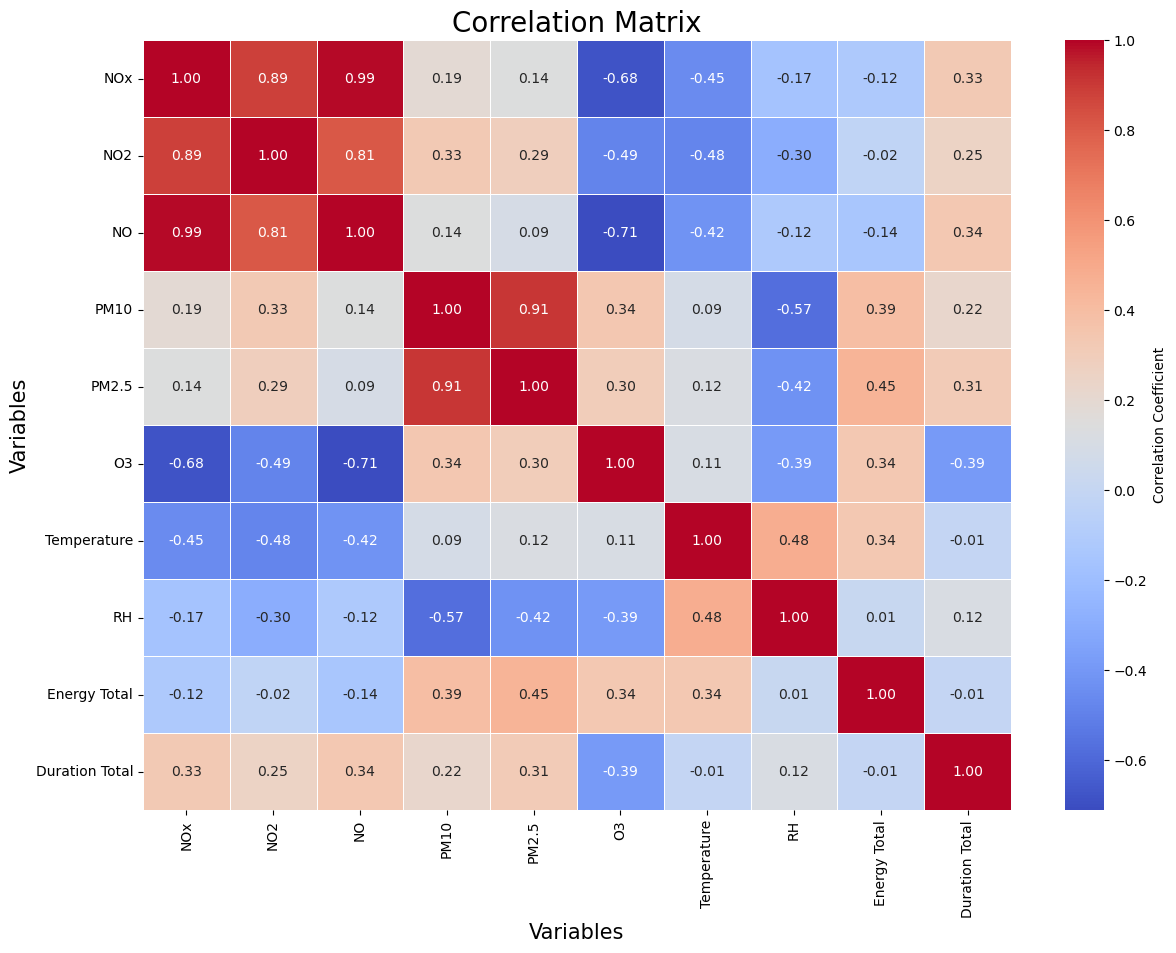

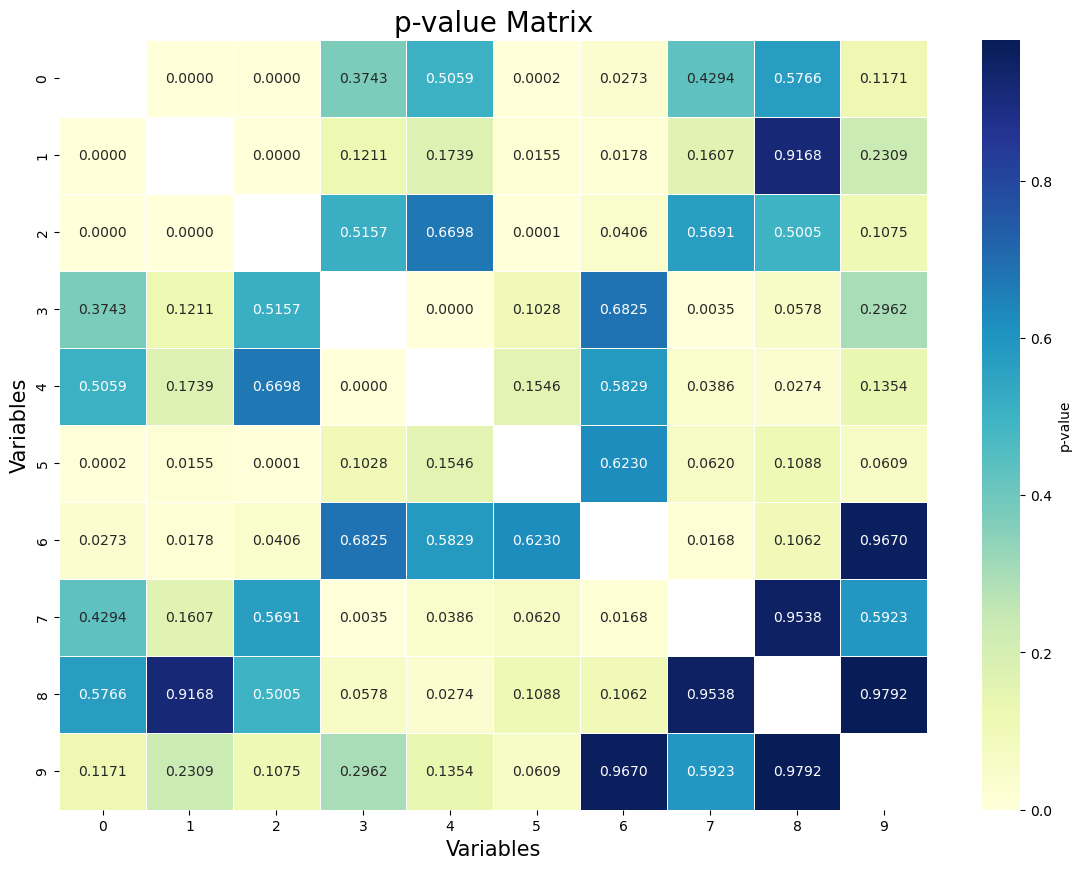

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assume correlation_matrix is the correlation matrix

# Calculate the p-value matrix
p_matrix = np.zeros_like(correlation_matrix)
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if col1 == col2:
            p_matrix[i, j] = np.nan
        else:
            _, p_value = pearsonr(merged_data[col1], merged_data[col2])
            p_matrix[i, j] = p_value

# Generate the correlation matrix chart
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, cbar_kws={"label": "Correlation Coefficient"})
plt.title("Correlation Matrix", fontsize=20)
plt.xlabel("Variables", fontsize=15)
plt.ylabel("Variables", fontsize=15)
plt.show()

# Generate the p-value matrix chart
plt.figure(figsize=(14, 10))
sns.heatmap(p_matrix, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=.5, cbar_kws={"label": "p-value"})
plt.title("p-value Matrix", fontsize=20)
plt.xlabel("Variables", fontsize=15)
plt.ylabel("Variables", fontsize=15)
plt.show()


In [20]:
scaler = MinMaxScaler()
merge_table2[columns] = scaler.fit_transform(merge_table2[columns])
correlation_matrix = filtered_averaged_data[["NOx","NO2", "NO", "PM10","PM2.5", "O3"]].corr()
print(correlation_matrix)

            NOx       NO2        NO      PM10     PM2.5        O3
NOx    1.000000  0.882989  0.986528  0.128320  0.166591 -0.669068
NO2    0.882989  1.000000  0.794307  0.156476  0.269760 -0.503304
NO     0.986528  0.794307  1.000000  0.111706  0.121715 -0.690622
PM10   0.128320  0.156476  0.111706  1.000000  0.799876  0.213461
PM2.5  0.166591  0.269760  0.121715  0.799876  1.000000  0.141605
O3    -0.669068 -0.503304 -0.690622  0.213461  0.141605  1.000000


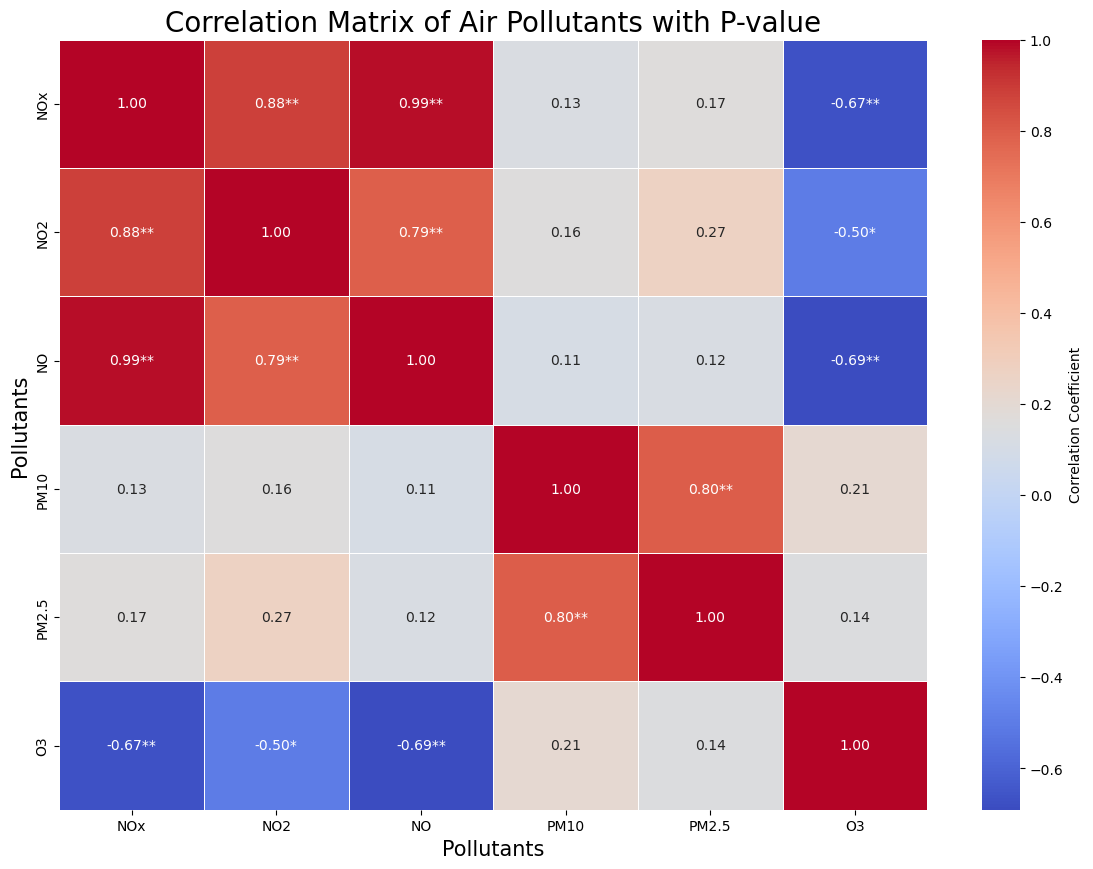

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 假设 correlation_matrix 是相关性矩阵

# 计算 p 值矩阵
p_matrix = np.zeros_like(correlation_matrix)
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if col1 == col2:
            p_matrix[i, j] = np.nan
        else:
            _, p_value = pearsonr(merged_data[col1], merged_data[col2])
            p_matrix[i, j] = p_value

# 创建星号矩阵
stars = np.full_like(correlation_matrix, '', dtype=object)
stars[p_matrix < 0.01] = '**'
stars[(p_matrix >= 0.01) & (p_matrix < 0.05)] = '*'

# 创建带星号的相关性矩阵
annot_matrix = correlation_matrix.copy()
for i, row in enumerate(annot_matrix.index):
    for j, col in enumerate(annot_matrix.columns):
        annot_matrix.at[row, col] = f"{annot_matrix.at[row, col]:.2f}{stars[i, j]}"

# 生成带星号的相关性矩阵图表
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=annot_matrix, fmt='', cmap="coolwarm", linewidths=.5, cbar_kws={"label": "Correlation Coefficient"})
plt.title("Correlation Matrix of Air Pollutants with P-value", fontsize=20)
plt.xlabel("Pollutants", fontsize=15)
plt.ylabel("Pollutants", fontsize=15)
plt.show()
